# Predictive Analytics for Retail Banking

Analytics is helping the banking industry become smarter in managing the myriad challenges.

Challenges:
- What is a suitable product to recommend to a customer?
- What is the best time to market the product?
- Which is the most effective channel to contact a customer?

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone alls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
The goal is to predict if the client will subscribe a term deposit

In [1]:
# Import all required libraries for reading data, analysing and visualizing data

import numpy as np
import pandas as pd

In [3]:
# Top 5 rows of the dataset
data = pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:

data['default'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)


In [6]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [8]:
data=data.rename(columns={'default':'defaulter','previous':'prev'})

In [9]:
data["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [10]:
data

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


In [11]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
defaulter,0
balance,0
housing,0
loan,0
contact,0
day,0


In [12]:
data.describe()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [13]:
# To get a concise summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   defaulter  11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  prev       11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [28]:
data.cov(numeric_only=True)

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,141.928366,-0.016573,4.315184e+03,-1.003487,-0.126211,-0.076486,0.782547,-0.171159,3.593995,0.550713,0.207618
defaulter,-0.016573,0.014826,-2.393849e+01,0.000673,0.003138,0.017781,-0.412504,0.010267,-0.480468,-0.009844,-0.002473
balance,4315.183833,-23.938489,1.040329e+07,-124.152669,-91.998857,284.299484,25120.222216,-121.985317,6107.664002,227.733044,130.663269
housing,-1.003487,0.000673,-1.241527e+02,0.249300,0.012924,-0.062099,6.075051,0.009052,3.502385,-0.000962,-0.050833
loan,-0.126211,0.003138,-9.199886e+01,0.012924,0.113702,0.049034,-0.223992,0.031870,-1.115437,-0.017519,-0.018619
day,-0.076486,0.017781,2.842995e+02,-0.062099,0.049034,70.908854,-54.110259,3.140457,-70.730655,-1.138351,-0.236838
duration,0.782547,-0.412504,2.512022e+04,6.075051,-0.223992,-54.110259,120498.116170,-39.268069,-1034.115689,-21.255941,78.333097
campaign,-0.171159,0.010267,-1.219853e+02,0.009052,0.031870,3.140457,-39.268069,7.409704,-30.411886,-0.310076,-0.174092
pdays,3.593995,-0.480468,6.107664e+03,3.502385,-1.115437,-70.730655,-1034.115689,-30.411886,11828.363897,126.450007,8.232549
prev,0.550713,-0.009844,2.277330e+02,-0.000962,-0.017519,-1.138351,-21.255941,-0.310076,126.450007,5.253297,0.160076


In [29]:
data.corr(numeric_only=True)

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
defaulter,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
prev,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


In [34]:
data.pivot_table(values=['age', 'balance', 'campaign', 'day','defaulter','deposit','duration','housing','loan','pdays','prev'], index="job")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
job,,,,,,,,,,,
admin.,39.374063,1195.866567,2.376312,15.340330,0.008246,0.473013,347.929535,0.554723,0.176912,64.338831,0.973763
blue-collar,39.505144,1203.926440,2.541152,15.235597,0.021091,0.364198,394.658951,0.679527,0.173354,44.061214,0.633230
entrepreneur,42.887195,1621.942073,2.725610,15.442073,0.030488,0.375000,370.182927,0.506098,0.213415,32.746951,0.536585
housemaid,47.445255,1366.160584,2.689781,16.364964,0.029197,0.397810,348.346715,0.277372,0.072993,33.540146,0.503650
management,40.218239,1793.663679,2.588075,15.792284,0.015199,0.507015,361.482073,0.418161,0.101325,54.456352,0.925175
retired,65.424165,2417.250643,2.131105,15.519280,0.006427,0.663239,389.993573,0.158098,0.070694,53.003856,0.994859
self-employed,39.809877,1865.372840,2.533333,15.938272,0.019753,0.461728,396.155556,0.429630,0.138272,45.039506,0.804938
services,38.141928,1081.171181,2.576381,15.728061,0.007584,0.399783,385.955580,0.613218,0.166847,51.546046,0.684724
student,26.102778,1500.783333,2.169444,15.175000,0.002778,0.747222,330.672222,0.141667,0.002778,68.683333,1.297222


In [35]:
data.pivot_table(values=['age', 'balance', 'campaign', 'day','defaulter','deposit','duration','housing','loan','pdays','prev'], index="month")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
month,,,,,,,,,,,
apr,40.247021,1734.264355,1.833153,18.630553,0.007584,0.625135,398.721560,0.517876,0.087757,80.005417,0.980498
aug,42.826860,1580.872943,3.514812,15.494404,0.013825,0.452930,352.072416,0.183673,0.078999,32.930217,0.624753
dec,45.745455,2735.209091,2.181818,14.481818,0.000000,0.909091,397.054545,0.181818,0.027273,113.172727,2.218182
feb,41.943299,1568.166237,2.155928,8.541237,0.006443,0.568299,343.125000,0.324742,0.117268,72.426546,1.304124
jan,42.345930,1151.093023,1.729651,25.773256,0.017442,0.412791,349.482558,0.235465,0.136628,62.619186,1.290698
jul,41.123514,1061.122193,3.294584,18.407530,0.030383,0.414135,418.867239,0.440555,0.268164,24.017834,0.363276
jun,41.539280,1601.206219,2.853519,11.293781,0.021277,0.446809,364.742226,0.364975,0.114566,21.918167,0.505728
mar,43.427536,2118.605072,2.003623,13.438406,0.000000,0.898551,291.369565,0.224638,0.047101,66.322464,1.242754
may,38.728754,1192.357649,2.328258,15.510623,0.014873,0.327550,378.363669,0.839589,0.134207,56.211402,0.734065


In [37]:
data.pivot_table(values=['age', 'balance', 'campaign', 'day','defaulter','deposit','duration','housing','loan','pdays','prev'], index="marital")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
marital,,,,,,,,,,,
divorced,47.365043,1371.835267,2.457077,15.689869,0.021655,0.481052,392.481825,0.483372,0.155452,46.651199,0.664346
married,44.533617,1599.927570,2.621477,15.678791,0.014328,0.433790,361.063769,0.488899,0.143757,49.505432,0.822233
single,33.017339,1457.255259,2.323195,15.608869,0.013928,0.543491,384.195566,0.440875,0.098351,56.344798,0.913019


In [38]:
data.pivot_table(values=['age', 'balance', 'campaign', 'day','defaulter','deposit','duration','housing','loan','pdays','prev'], index="education")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
education,,,,,,,,,,,
primary,48.220667,1523.031333,2.646000,15.510667,0.019333,0.394000,383.803333,0.494667,0.136667,39.976667,0.688000
secondary,40.086012,1296.480278,2.470051,15.568846,0.014974,0.447407,373.344960,0.533419,0.158145,53.302045,0.821768
tertiary,39.513147,1845.869070,2.487395,15.782597,0.013012,0.541068,368.627812,0.391434,0.098401,53.120629,0.924370
unknown,45.523139,1746.605634,2.672032,16.160966,0.018109,0.507042,346.448692,0.350101,0.052314,50.585513,0.706237


In [39]:
data['deposit'].value_counts()

,count
deposit,
0,5873
1,5289


# EDA

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'balance')

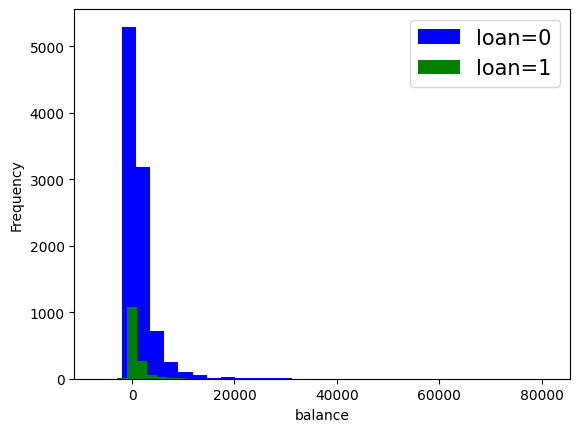

In [41]:
data[data['loan']==0]['balance'].plot.hist(bins=30,color='blue', label='loan=0')
data[data['loan']==1]['balance'].plot.hist(bins=30, color='green', label='loan=1')
plt.legend(fontsize=15)
plt.xlabel("balance")

Text(0.5, 0, 'age')

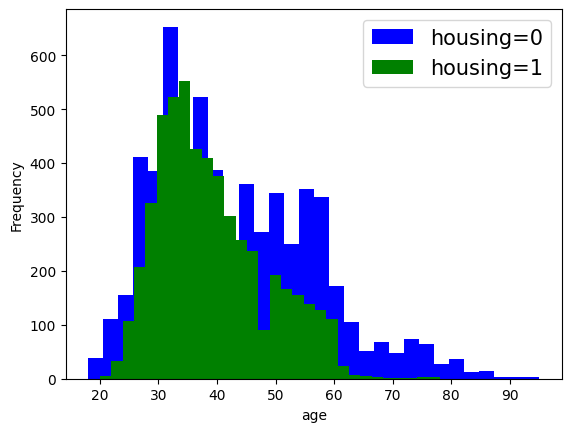

In [42]:
data[data['housing']==0]['age'].plot.hist(bins=30,color='blue', label='housing=0')
data[data['housing']==1]['age'].plot.hist(bins=30, color='green', label='housing=1')
plt.legend(fontsize=15)
plt.xlabel("age")

Text(0.5, 0, 'duration')

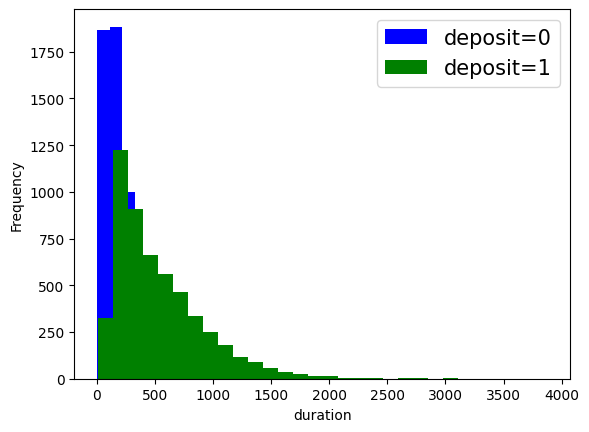

In [43]:
data[data['deposit']==0]['duration'].plot.hist(bins=30,color='blue', label='deposit=0')
data[data['deposit']==1]['duration'].plot.hist(bins=30, color='green', label='deposit=1')
plt.legend(fontsize=15)
plt.xlabel("duration")

Text(0, 0.5, 'balance')

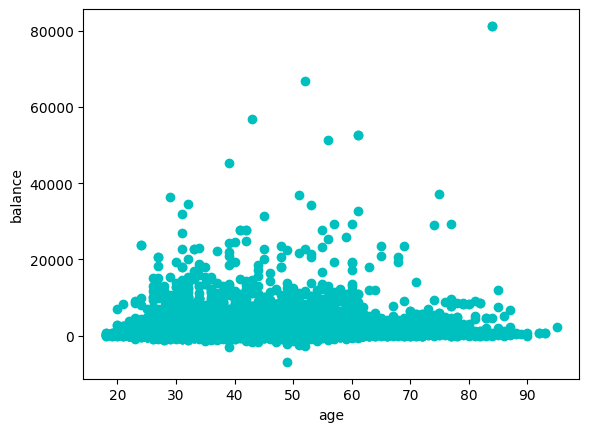

In [44]:
%matplotlib inline
plt.scatter(data["age"],data["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")

<Axes: >

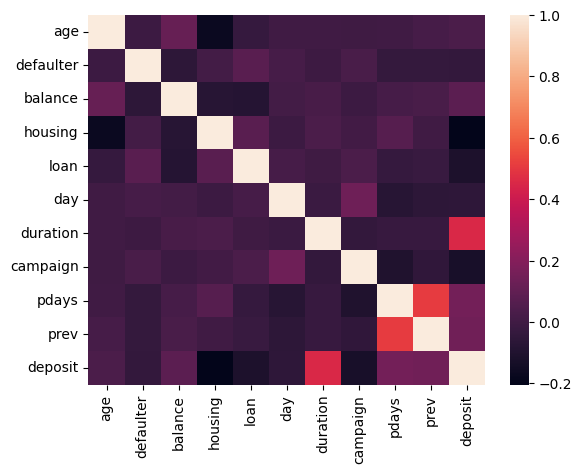

In [46]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True))

Text(0.5, 0, 'month')

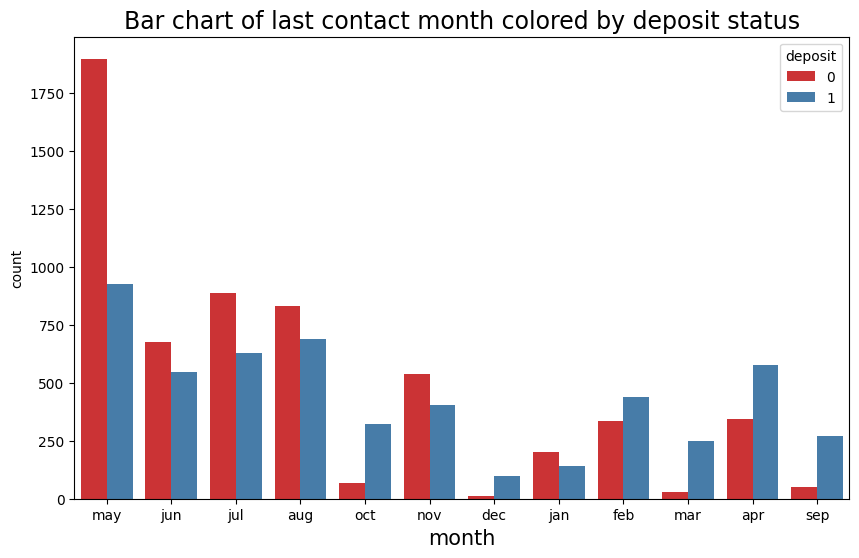

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("month", fontsize=15)

Text(0.5, 0, 'contact')

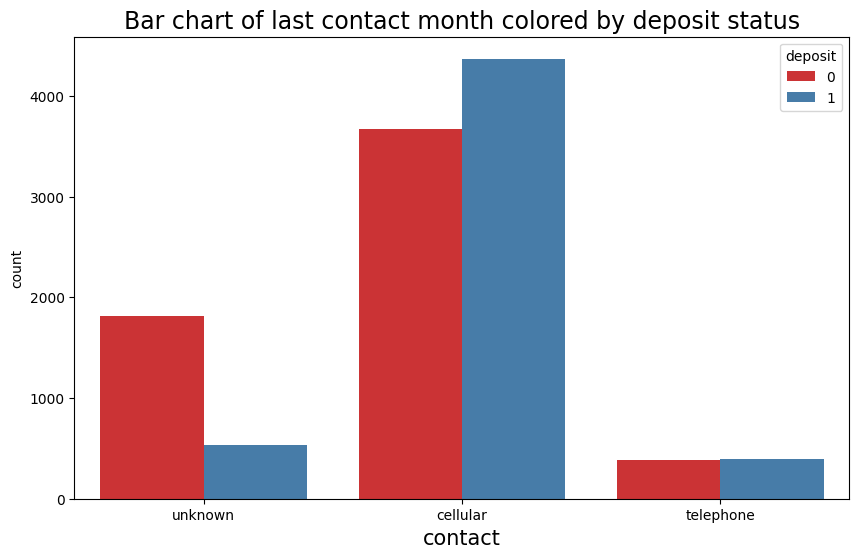

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='contact',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("contact", fontsize=15)

Text(0.5, 0, 'marital')

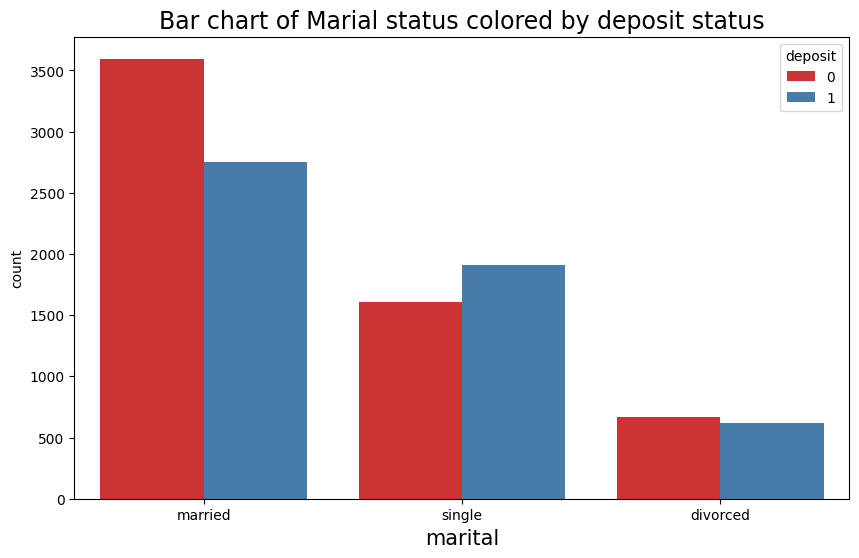

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of Marial status colored by deposit status", fontsize=17)
plt.xlabel("marital", fontsize=15)

Text(0.5, 0, 'poutcome')

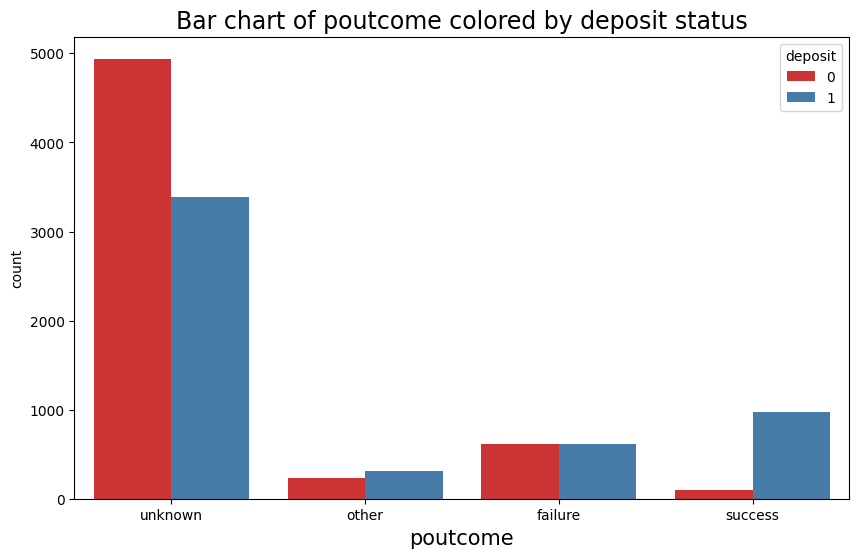

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of poutcome colored by deposit status", fontsize=17)
plt.xlabel("poutcome", fontsize=15)

Text(0.5, 0, 'education')

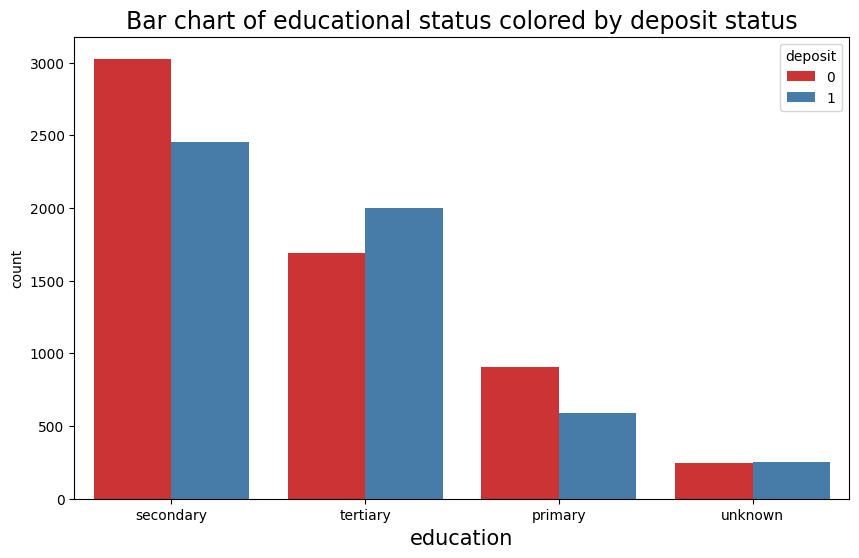

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of educational status colored by deposit status", fontsize=17)
plt.xlabel("education", fontsize=15)

Text(0.5, 0, 'job')

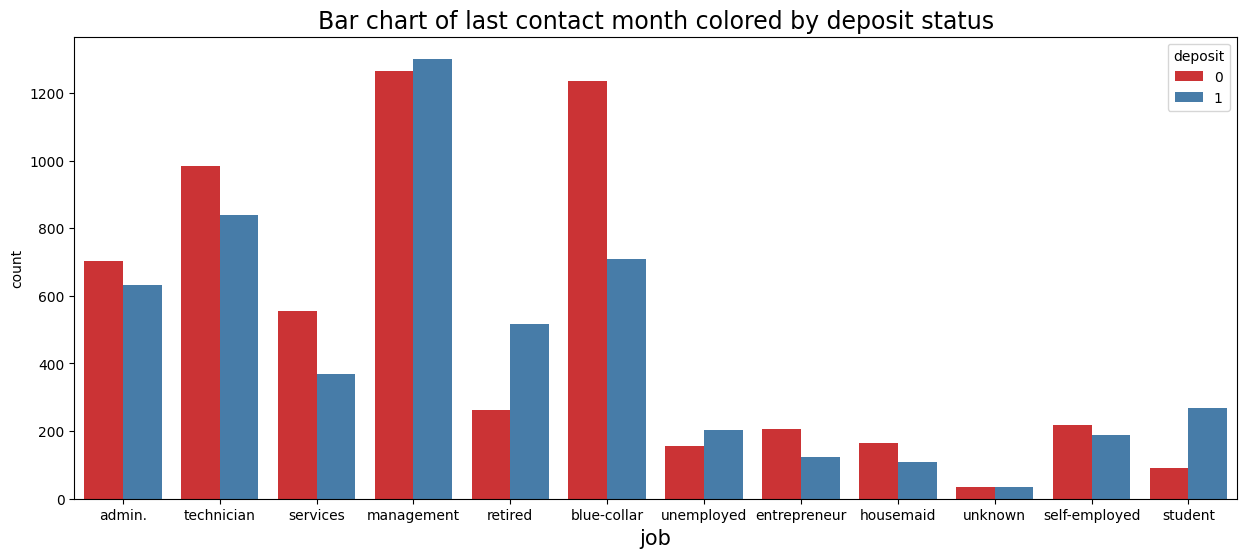

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("job", fontsize=15)

Text(0, 0.5, 'Duration')

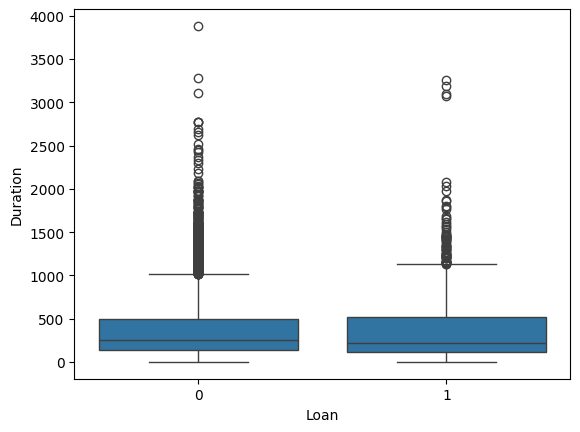

In [53]:
sns.boxplot(x=data['loan'],y=data['duration'])
plt.xlabel("Loan")
plt.ylabel("Duration")

In [54]:
data["pdays"].replace(-1,int(0),inplace=True)
data.head()

<ipython-input-54-c48faaa55436>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["pdays"].replace(-1,int(0),inplace=True)


,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,0,unknown,1


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])
data

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,0,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,0,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,0,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [56]:
data['job'].unique()

array([0, 9, 7, 4, 5, 1, 10, 2, 3, 11, 6, 8], dtype=object)

In [57]:
data['marital'].unique()

array([1, 2, 0], dtype=object)

In [58]:
data['education'].unique()

array([1, 2, 0, 3], dtype=object)

In [59]:
data['contact'].unique()

array([2, 0, 1], dtype=object)

In [60]:
data['month'].unique()

array([8, 6, 5, 1, 10, 9, 2, 4, 3, 7, 0, 11], dtype=object)

In [61]:
data['poutcome'].unique()

array([3, 1, 0, 2], dtype=object)

In [62]:
X=data.drop(columns=["day","deposit"])
Y=data["deposit"]

In [63]:
X

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
0,59,0,1,1,0,2343,1,0,2,8,1042,1,0,0,3
1,56,0,1,1,0,45,0,0,2,8,1467,1,0,0,3
2,41,9,1,1,0,1270,1,0,2,8,1389,1,0,0,3
3,55,7,1,1,0,2476,1,0,2,8,579,1,0,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,0,257,1,0,0,3
11158,39,7,1,1,0,733,0,0,2,6,83,4,0,0,3
11159,32,9,2,1,0,29,0,0,0,1,156,2,0,0,3
11160,43,9,1,1,0,0,0,1,0,8,9,2,172,5,0


In [64]:
Y

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


# preprocessing the data

In [65]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20140515, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

# Train Test Split

In [66]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [67]:
X_train

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
5016,54,6,2,2,0,384,0,1,0,8,200,1,0,0,3
11021,32,1,1,1,1,-238,1,0,2,8,427,1,0,0,3
10196,46,0,2,3,0,306,1,0,0,8,289,5,0,0,3
4994,41,1,1,0,0,1461,1,0,2,6,554,2,0,0,3
500,32,7,0,1,0,454,1,0,0,5,978,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,47,1,1,1,0,1612,1,0,0,0,1164,1,0,0,3
952,37,9,1,1,0,5115,1,0,0,9,1210,2,171,4,0
5528,40,6,2,2,0,-94,1,0,0,5,90,1,0,0,3
5098,55,4,1,2,0,7803,0,0,0,4,441,1,0,0,3


In [68]:
Y_train

,deposit
5016,1
11021,0
10196,0
4994,1
500,1
...,...
1399,1
952,1
5528,0
5098,1


In [69]:
X_test

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
9283,46,11,1,2,0,8564,0,0,0,1,397,2,342,1,0
2586,29,4,2,2,0,265,0,0,0,1,130,2,94,1,2
3440,76,5,1,1,0,820,0,0,1,0,263,4,0,0,3
2410,59,1,0,0,0,989,0,0,0,5,125,2,0,0,3
7536,38,1,2,1,0,1012,1,1,1,9,69,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,35,9,1,1,0,0,0,0,0,5,125,2,0,0,3
1834,44,1,1,0,0,4031,1,0,0,8,983,4,0,0,3
6284,49,7,1,1,0,1377,1,0,2,8,1101,1,0,0,3
5702,47,2,0,1,0,186,0,0,0,3,112,2,0,0,3


In [70]:
Y_test

,deposit
9283,0
2586,1
3440,1
2410,1
7536,0
...,...
6509,0
1834,1
6284,0
5702,0


# KNN classifier

In [71]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [72]:
Y_pred=clf.predict(X_test)

In [73]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 0]


In [74]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 1 ... 1 0 0]


In [75]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))




Accuracy score: 74.921630
Recall score : 72.090823
ROC score : 74.778405

[[911 265]
 [295 762]]


In [76]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

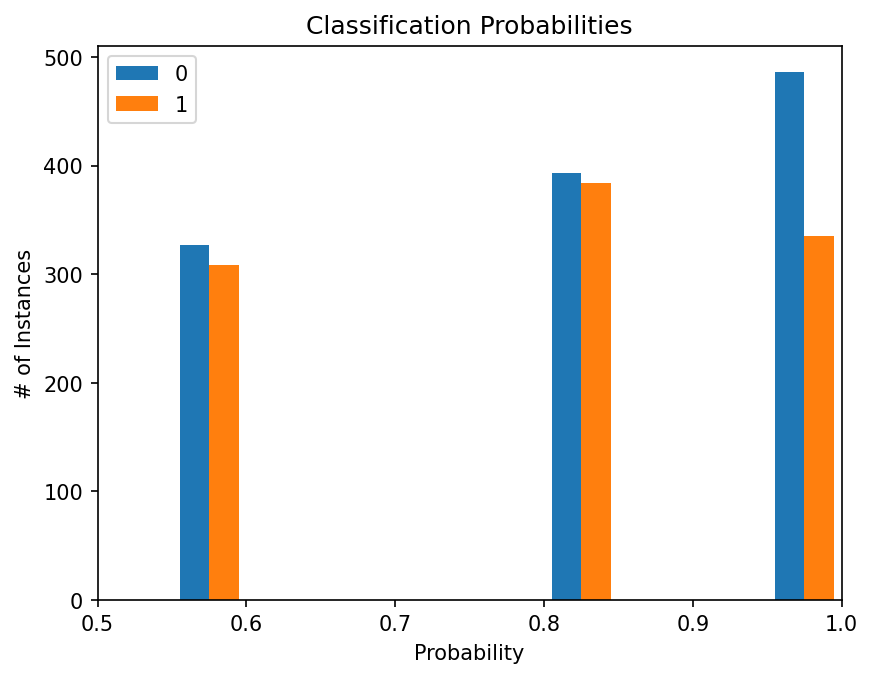

In [77]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

In [78]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [79]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [80]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [81]:
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class

In [82]:
clf_acc

array([0.73261673, 0.73454301, 0.73958333])

#  Logistic Regression

In [83]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
lr_acc

array([0.7860262 , 0.79737903, 0.79233871])

In [85]:
#Predict on test data
Y_pred=lr.predict(X_test)

In [86]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 0]


In [87]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 0 0 ... 1 0 0]


In [88]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 75.996417
Recall score : 69.631031
ROC score : 75.674359

[[961 215]
 [321 736]]


In [89]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# Decision Tree

In [90]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([0.75243534, 0.78830645, 0.76747312])

In [91]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)

In [92]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 0]


In [93]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 1 ... 1 0 0]


In [94]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_dt=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 76.444245
Recall score : 75.402081
ROC score : 76.391517

[[910 266]
 [260 797]]


In [95]:
dtc_clf_acc

array([0.75243534, 0.78830645, 0.76747312])

# Random Forest

In [96]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)

In [97]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([0.76452805, 0.76612903, 0.75504032])

In [98]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [99]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 0]


In [100]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 1 ... 0 0 0]


In [101]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 76.757725
Recall score : 70.387890
ROC score : 76.435442

[[970 206]
 [313 744]]


In [102]:
acc_rmf

76.75772503358709

In [103]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# svm

In [104]:
# Build Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

In [105]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [106]:
svc_acc

array([0.80349345, 0.80577957, 0.79670699])

In [107]:
#Predict on test data
Y_pred=svc_classifier.predict(X_test)

In [108]:
print('Actual deposit')
print(Y_test.values)

Actual deposit
[0 1 1 ... 0 0 0]


In [109]:
print('Predicted deposit')
print(Y_pred)

Predicted deposit
[1 0 0 ... 1 0 0]


In [110]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 73.802060
Recall score : 62.630085
ROC score : 73.236811

[[986 190]
 [395 662]]


AUC Score (kNN): 0.80 


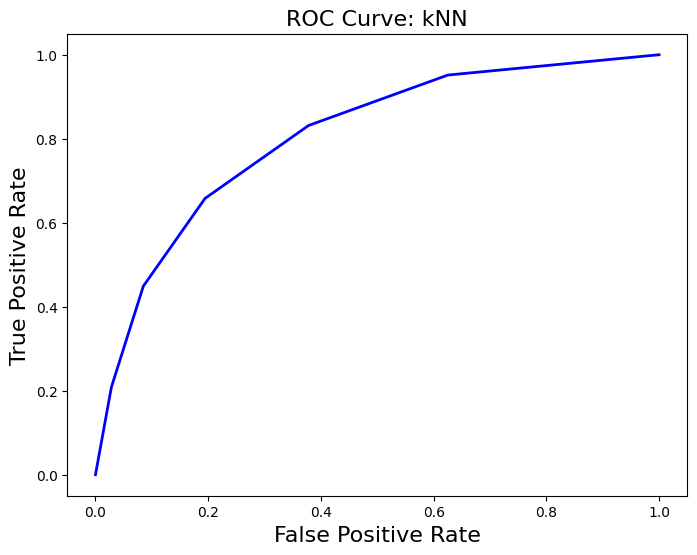

AUC Score (Logistic Regression): 0.86 


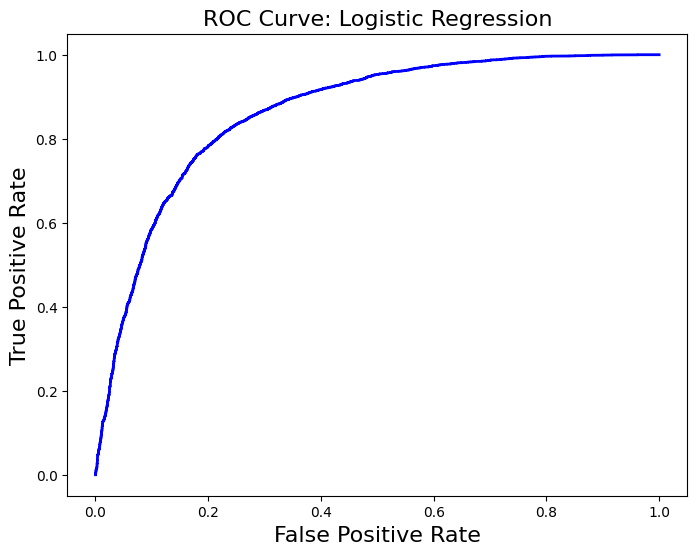

AUC Score (Support Vector Classification): 0.88 


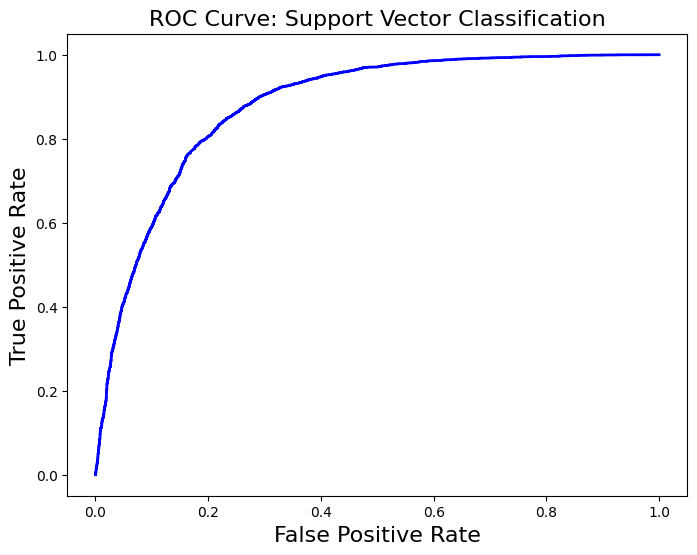

AUC Score (Decision Tree Classifier): 0.77 


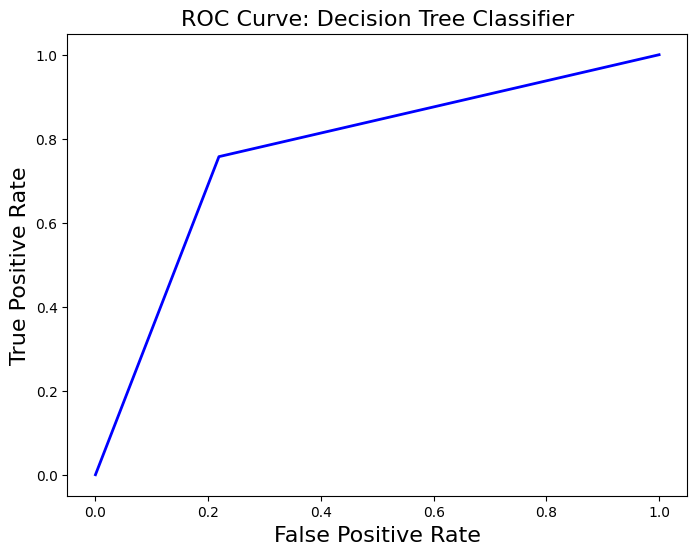

AUC Score (Random Forest Classifier): 0.85 


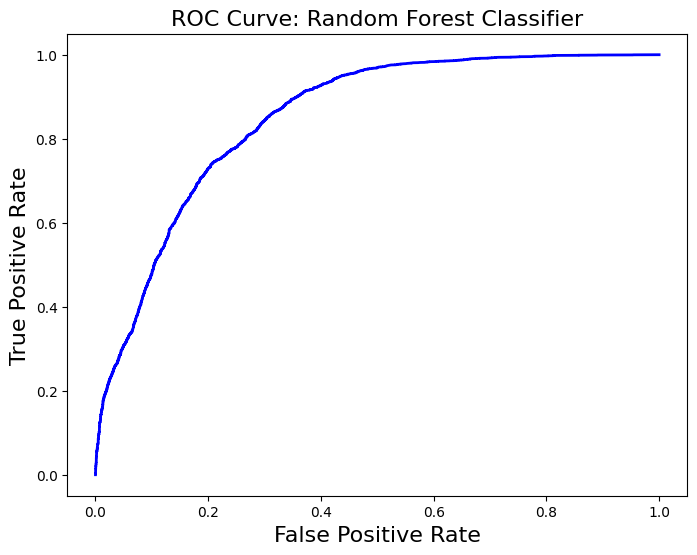

In [111]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)

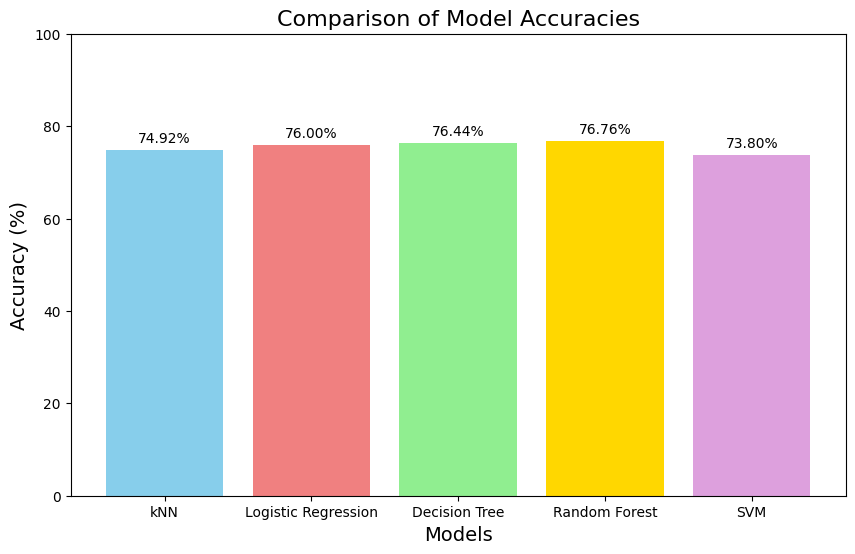

In [112]:
# prompt: create a bar chart for accuracy of all models for comparison

import matplotlib.pyplot as plt

# Accuracy scores for each model (replace with your actual scores)
model_names = ['kNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [knn_acc, acc_lr, acc_dt, acc_rmf, acc_svm]  # Replace with your variable names

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylim(0,100) # Set y-axis limit for better visualization

# Add accuracy values on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)  # Added percentage sign


plt.show()
